#EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Reading the dataset
 df=pd.read_csv('/content/ds_salaries.csv')
 df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
#No of rows and columns in the dataset
df.shape

(607, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [5]:
# Checking the descriptive stats of the numeric values present in the data
df.drop(columns=['Unnamed: 0'], inplace=True)
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#Checking for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# No of unique values present in the dataframe
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

Exploratory Data Analysis

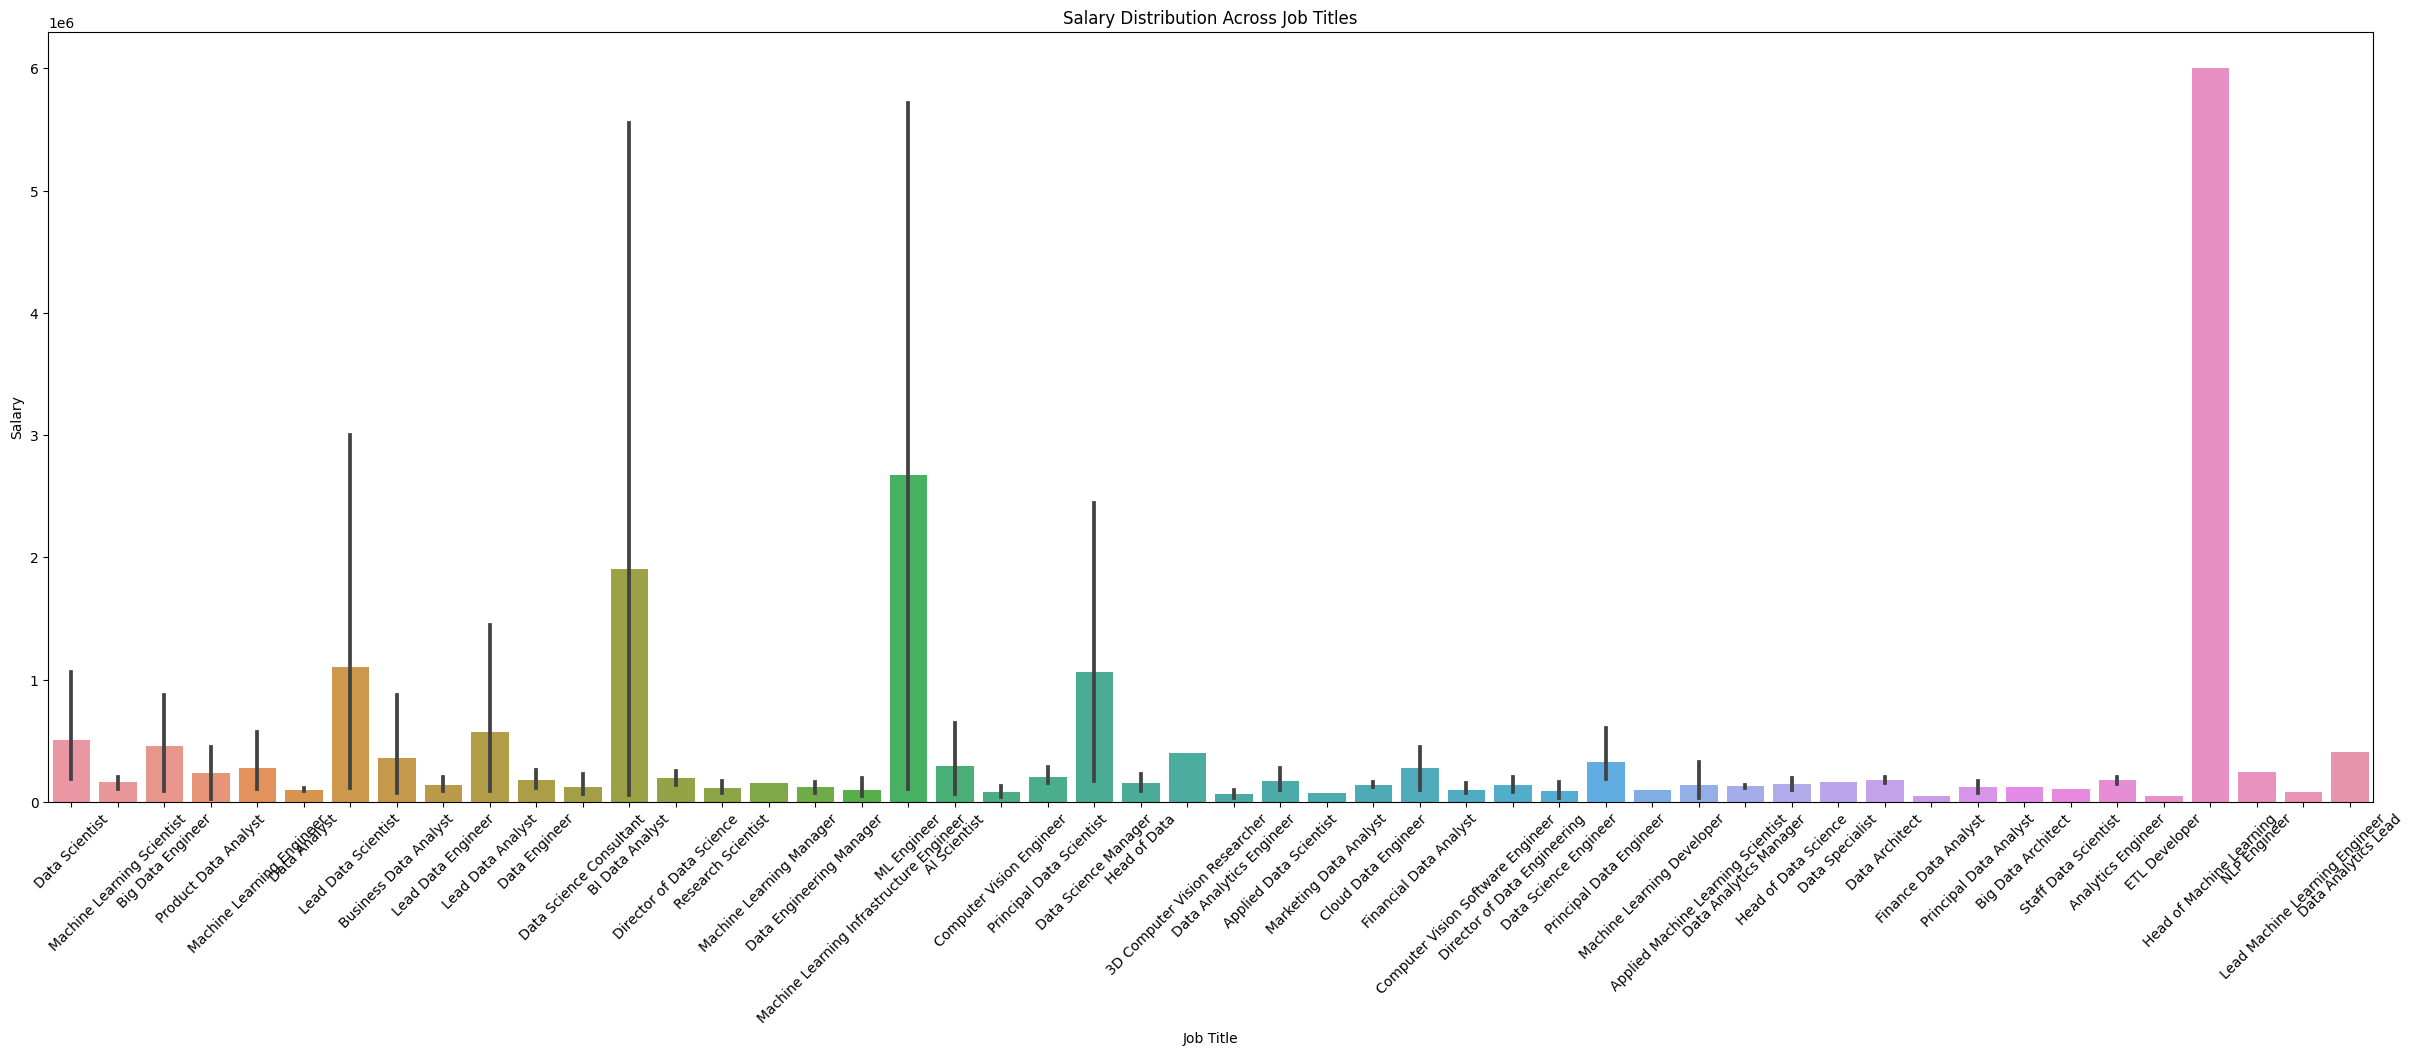

In [8]:
#Salary Distribution Across Job Titles
plt.figure(figsize=(30,10))
sns.barplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

([<matplotlib.patches.Wedge at 0x7d0cf5b024a0>,
 [Text(-0.2898772629889006, 1.0818369435372708, 'Data Scientist'),
  Text(-0.8531179175578061, -0.7256650871730241, 'Data Engineer'),
  Text(0.8119954801078902, -0.7714034873426209, 'Data Analyst'),
  Text(1.453065947251806, 0.3722893403486227, 'Machine Learning Engineer'),
  Text(0.8791108341981496, 0.6939482265957839, 'Research Scientist')],
 [Text(-0.16046777058314138, 0.5988740223152749, '33.3%'),
  Text(-0.47226170436235687, -0.40170745897078114, '30.8%'),
  Text(0.4494974979168677, -0.4270269304932365, '22.6%'),
  Text(0.9687106315012038, 0.24819289356574847, '9.6%'),
  Text(0.4866506403596899, 0.38414991115123753, '3.7%')])

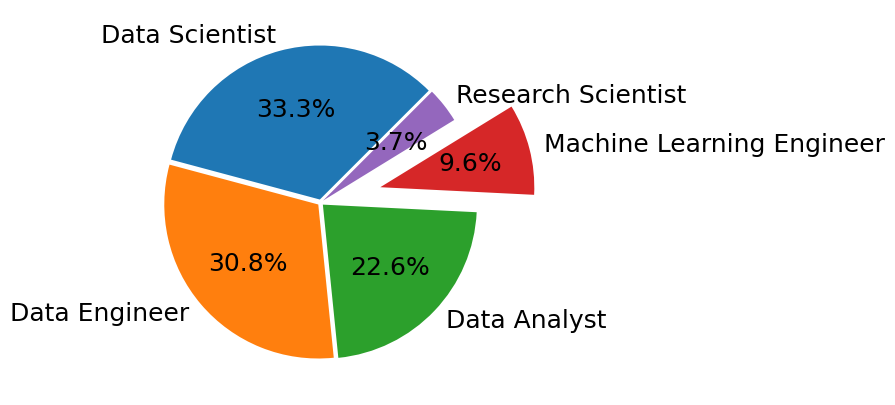

In [9]:
plt.figure(figsize=(5,5))
a=(df["job_title"].value_counts(normalize=True)*100).head()
b=df["job_title"].value_counts().head().index
exploda=(0.02,0.02,0.02,0.4,0.02)
plt.pie(a,labels=b,autopct='%1.1f%%',explode=exploda,startangle=45,textprops={'fontsize':18})

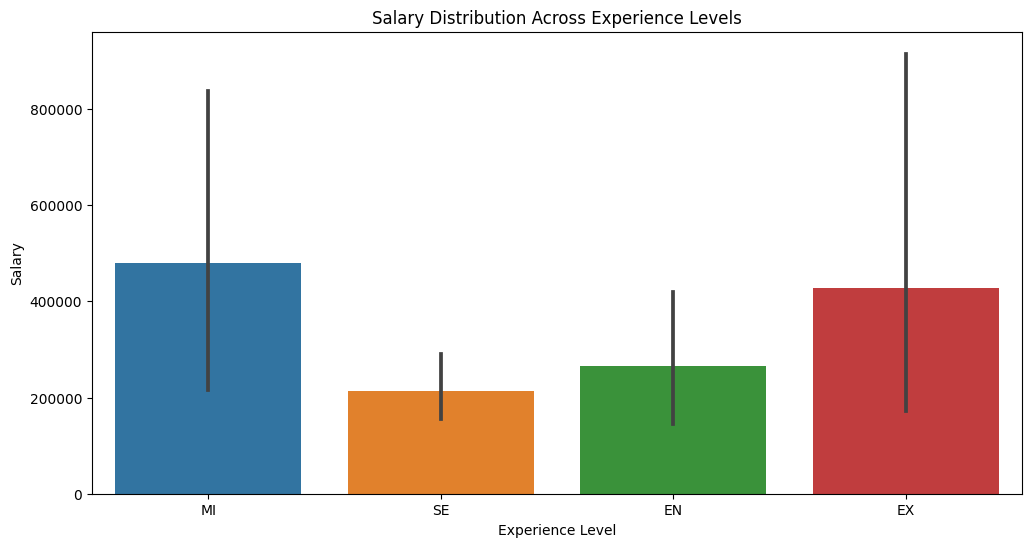

In [10]:
#Salary Distribution Across Experience Levels
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

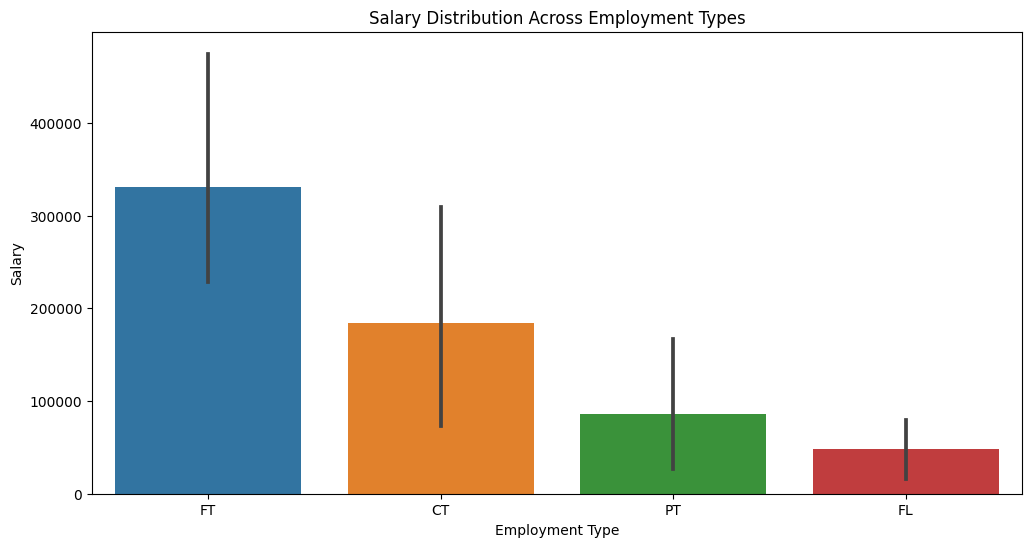

In [11]:
#Salary Distribution Across Employment Types
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary', data=df)
plt.title('Salary Distribution Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()

Visualize relationships using scatter plots and histograms

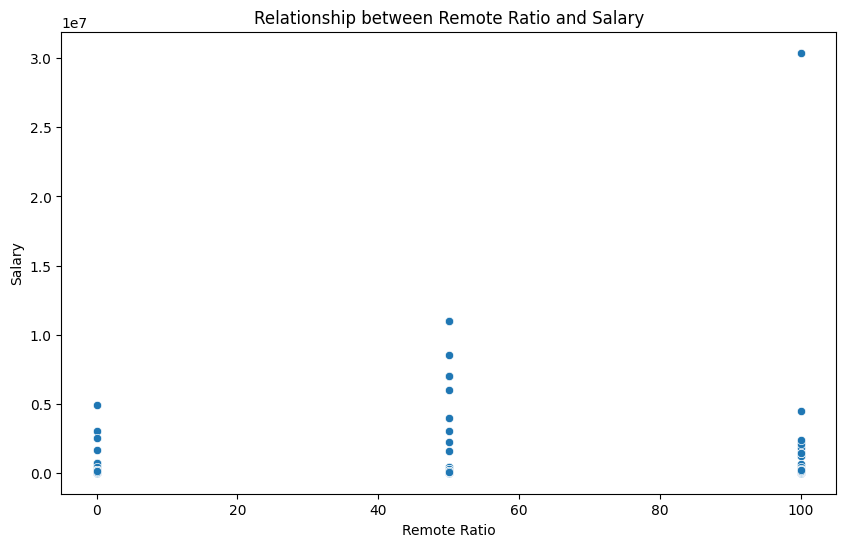

In [12]:
#Relationship between Remote Ratio and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary', data=df)
plt.title('Relationship between Remote Ratio and Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

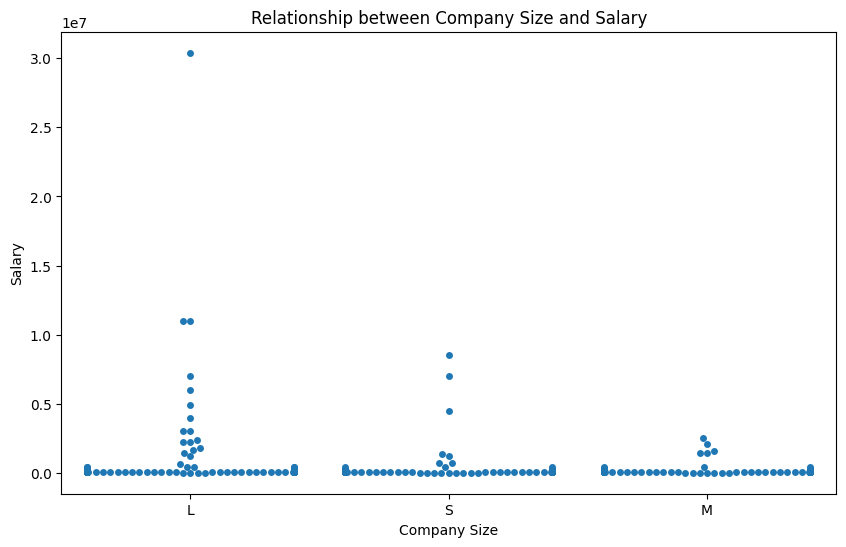

In [13]:
#Relationship between Company Size and Salary
plt.figure(figsize=(10, 6))
sns.swarmplot(x='company_size', y='salary', data=df)
plt.title('Relationship between Company Size and Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

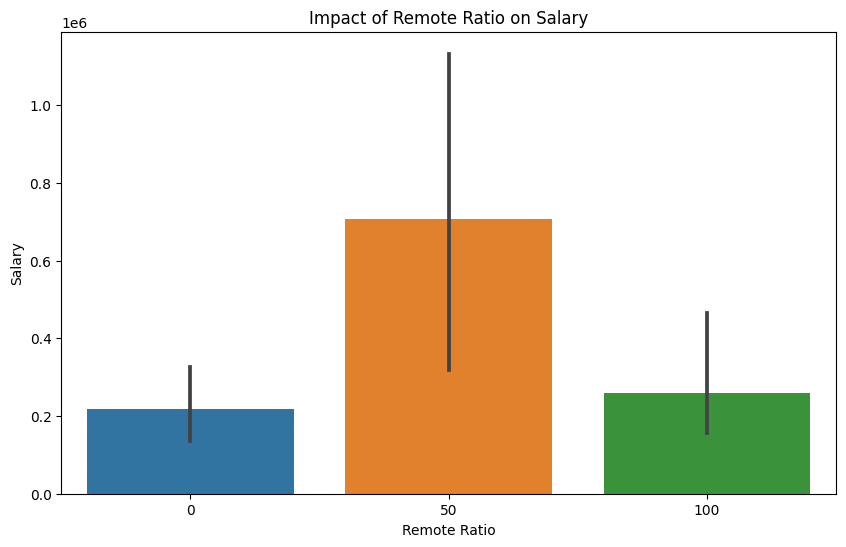

In [14]:
#Visualize trends in remote work percentages and company sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary', data=df)
plt.title('Impact of Remote Ratio on Salary')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
plt.show()

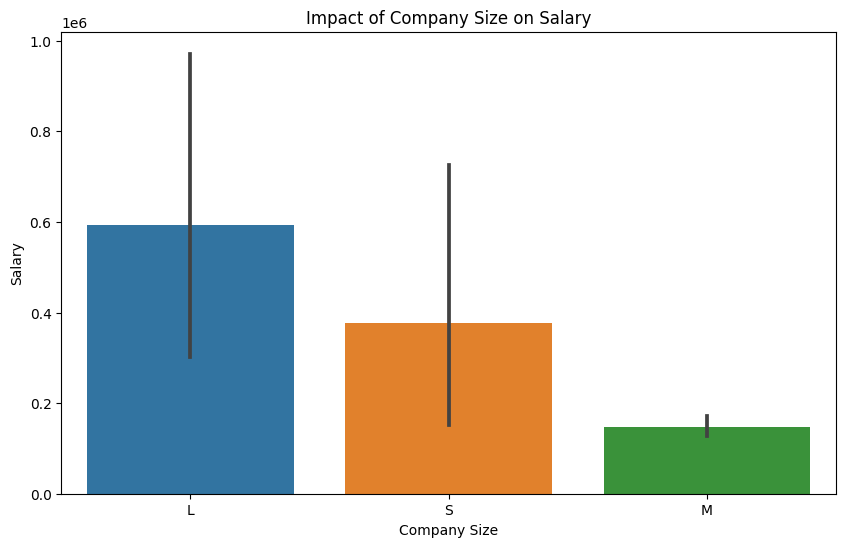

In [15]:
#Impact of Company Size on Salary
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary', data=df)
plt.title('Impact of Company Size on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

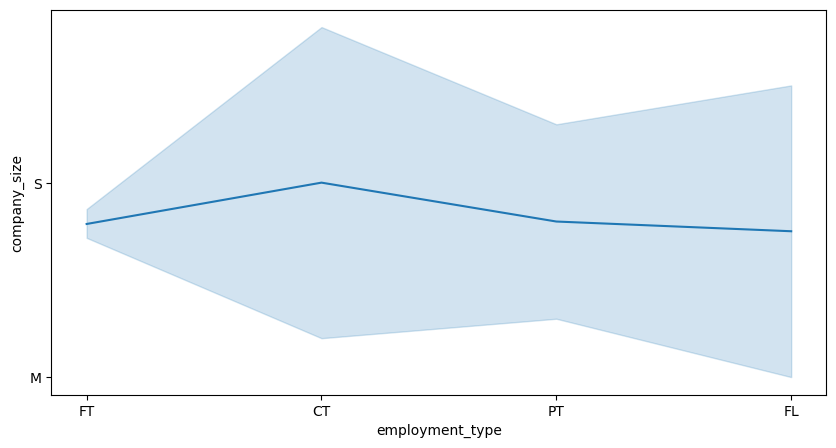

In [16]:
#Types of Employment
plt.figure(figsize=(10,5))
sns.lineplot(x=df['employment_type'],y=df['company_size'])
plt.show()

Feature Engineering

In [17]:
#Calculate average salary per job title
avg_salary_per_title = df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_per_title.rename(columns={'salary': 'avg_salary_per_title'}, inplace=True)
df = df.merge(avg_salary_per_title, on='job_title', how='left')

In [18]:
#Calculate average salary per experience level
avg_salary_per_exp = df.groupby('experience_level')['salary'].mean().reset_index()
avg_salary_per_exp.rename(columns={'salary': 'avg_salary_per_experience'}, inplace=True)
df = df.merge(avg_salary_per_exp, on='experience_level', how='left')

In [19]:
#Predictive Analysis
X= df[['avg_salary_per_title', 'avg_salary_per_experience']]
y = df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Select a regression model and train it on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7911525259556.634


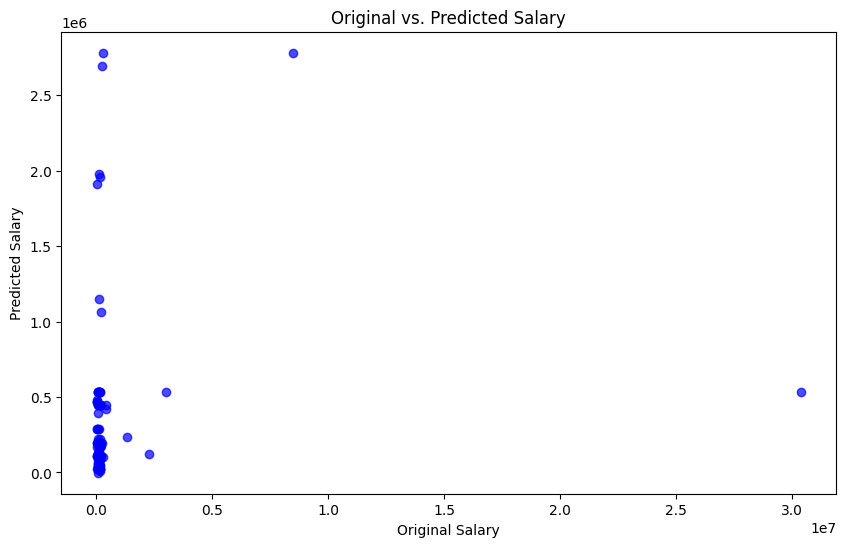

In [21]:
#Create a scatter plot to visualize original vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Original Salary')
plt.ylabel('Predicted Salary')
plt.title('Original vs. Predicted Salary')
plt.show()

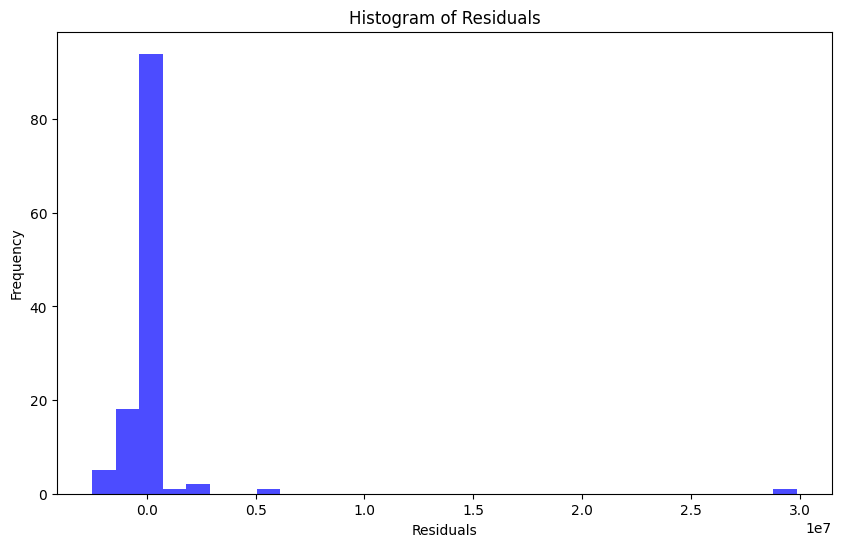

In [22]:
# Plot a histogram of the residuals (difference between original and predicted salaries)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()